In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import string
import operator

In [2]:
def cleanInput(input):
    input = re.sub('\n+', " ", input).lower()
    input = re.sub('\[[0-9]*\]', "", input)
    input = re.sub(' +', " ", input)
    input = bytes(input, "UTF-8")
    input = input.decode("ascii", "ignore")
    cleanInput = []
    input = input.split(' ')
    for item in input:
        item = item.strip(string.punctuation)
        if len(item) > 1 or (item.lower() == 'a' or item.lower() == 'i'):
            cleanInput.append(item)
    return cleanInput

def ngrams(input, n):
    input = cleanInput(input)
    output = {}
    for i in range(len(input)-n+1):
        ngramTemp = " ".join(input[i:i+n])
        if ngramTemp not in output:
            output[ngramTemp] = 0
        output[ngramTemp] += 1
    return output

In [4]:
content= str(urlopen("http://pythonscraping.com/files/inaugurationSpeech.txt").read(), 'utf-8')
ngrams = ngrams(content, 2)
sortedNGrams = sorted(ngrams.items(), key = operator.itemgetter(1), reverse=True)
print(sortedNGrams)

[('of the', 213), ('in the', 65), ('to the', 61), ('by the', 41), ('the constitution', 34), ('of our', 29), ('to be', 26), ('the people', 24), ('from the', 24), ('that the', 23), ('and the', 23), ('it is', 23), ('of a', 22), ('may be', 19), ('of their', 19), ('the executive', 19), ('of that', 18), ('for the', 16), ('of its', 16), ('of power', 16), ('have been', 16), ('is the', 16), ('with the', 15), ('the government', 15), ('all the', 15), ('which they', 13), ('has been', 13), ('there is', 13), ('power to', 12), ('the power', 11), ('that of', 11), ('as to', 11), ('their own', 11), ('the same', 11), ('spirit of', 11), ('which the', 10), ('but the', 10), ('which it', 10), ('upon the', 10), ('can be', 10), ('the united', 10), ('united states', 10), ('of all', 10), ('as the', 10), ('part of', 10), ('the character', 10), ('of liberty', 10), ('of my', 9), ('to a', 9), ('it was', 9), ('the great', 9), ('on the', 9), ('of any', 9), ('the president', 9), ('the whole', 9), ('it may', 8), ('of th

In [5]:
def isCommon(ngram):
    commonWords = ["the", "be", "and", "of", "a", "in", "to", "have", "it",
                     "i", "that", "for", "you", "he", "with", "on", "do", "say",
                        "this", "they", "is", "an", "at", "but","we", "his", "from",
                        "that", "not", "by", "she", "or", "as", "what", "go", "their",
                        "can", "who", "get", "if", "would", "her", "all", "my", "make",
                        "about", "know", "will", "as", "up", "one", "time", "has", "been",
                        "there", "year", "so", "think", "when", "which", "them", "some",
                        "me", "people", "take", "out", "into", "just", "see", "him", "your",
                        "come", "could", "now", "than", "like", "other", "how", "then", "its",
                        "our", "two", "more", "these", "want", "way", "look", "first", "also"]
    for word in ngram:
        if word in commonWords:
            return True
    return False

def ngrams(input, n):
    input = cleanInput(input)
    output = {}
    for i in range(len(input)-n+1):
        ngramTemp = " ".join(input[i:i+n])
        if isCommon(ngramTemp.split()):
            continue
        if ngramTemp not in output:
            output[ngramTemp] = 0
        output[ngramTemp] += 1
    return output

ngrams = ngrams(content, 2)
sortedNGrams = sorted(ngrams.items(), key = operator.itemgetter(1), reverse=True)
print(sortedNGrams)

[('united states', 10), ('executive department', 4), ('general government', 4), ('called upon', 3), ('chief magistrate', 3), ('mr jefferson', 3), ('legislative body', 3), ('same causes', 3), ('government should', 3), ('whole country', 3), ('was observable', 2), ('too well', 2), ('express grant', 2), ('several departments', 2), ('american citizen', 2), ("no one's", 2), ('was intended', 2), ('are attributable', 2), ('upon another', 2), ('reserved rights', 2), ('federal government', 2), ('increase itself', 2), ('were made', 2), ('heretofore given', 2), ('pristine health', 2), ('second term', 2), ('observed however', 2), ('foreign relations', 2), ('executive power', 2), ('no part', 2), ('negative upon', 2), ('declare void', 2), ('both houses', 2), ('used only', 2), ('state governments', 2), ('immediate representatives', 2), ('veto power', 2), ('high office', 2), ('disputed points', 2), ('respectively claim', 2), ('reserved powers', 2), ('state authorities', 2), ('great increase', 2), ('ele

In [9]:
from random import randint

def wordListSum(wordList):
    sum = 0
    for word, value in wordList.items():
        sum += value
    return sum

def retrieveRandomWord(wordList):
    randIndex = randint(1, wordListSum(wordList))
    for word, value in wordList.items():
        randIndex -= value
        if randIndex <= 0:
            return word
        
def buildWordDict(text):
    text = cleanInput(text)
    wordDict = {}
    for i in range(1, len(text)):
        if text[i-1] not in wordDict:
            wordDict[text[i-1]] = {}
        if text[i] not in wordDict[text[i-1]]:
            wordDict[text[i-1]][text[i]] = 0
        wordDict[text[i-1]][text[i]] += 1
    return wordDict

text = str(urlopen("http://pythonscraping.com/files/inaugurationSpeech.txt").read(), 'utf-8')
wordDict = buildWordDict(text)

length = 100
chain = ""
currentWord = "i"
for i in range(0, length):
    chain += currentWord + " "
    currentWord = retrieveRandomWord(wordDict[currentWord])

print(chain)

i wish for a weaker and to our domestic concerns however strong as the rights alone not permit us unite in the principle which in every president placed in the latter also to provide some of things has been drawn as fatal to it exclusively to remove a discrepancy was a great abilities and prejudices so great increase of such a full of the early saw and has gone forth proclaiming me to its citizens will i too much apprehension is on the human bosom and forbearance our countrymen who spend a few months will be corrected the right believing 


In [18]:
from nltk import word_tokenize, Text

[nltk_data] Downloading package punkt to /Users/mba/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


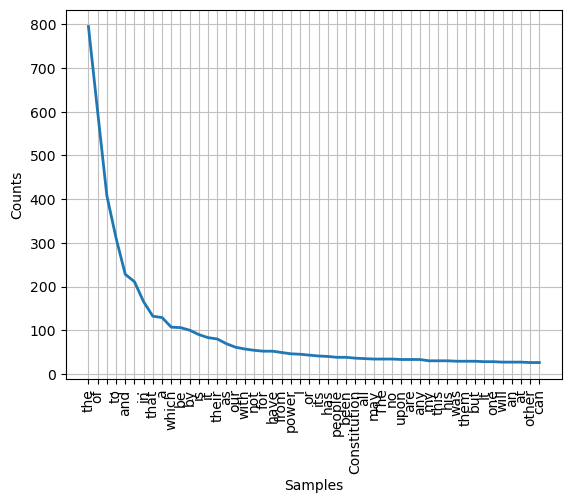

<Axes: xlabel='Samples', ylabel='Counts'>

In [28]:
import nltk
nltk.download('punkt')
content= str(urlopen("http://pythonscraping.com/files/inaugurationSpeech.txt").read(), 'utf-8')
from nltk import FreqDist
fdist = FreqDist(word_tokenize(content, language='english', preserve_line=False))
fdist.plot(50, cumulative=False)

In [29]:
fdist.most_common(10)

[('the', 795),
 ('of', 600),
 (',', 408),
 ('to', 311),
 ('and', 228),
 ('.', 211),
 ('in', 165),
 ('that', 132),
 ('a', 129),
 ('which', 107)]

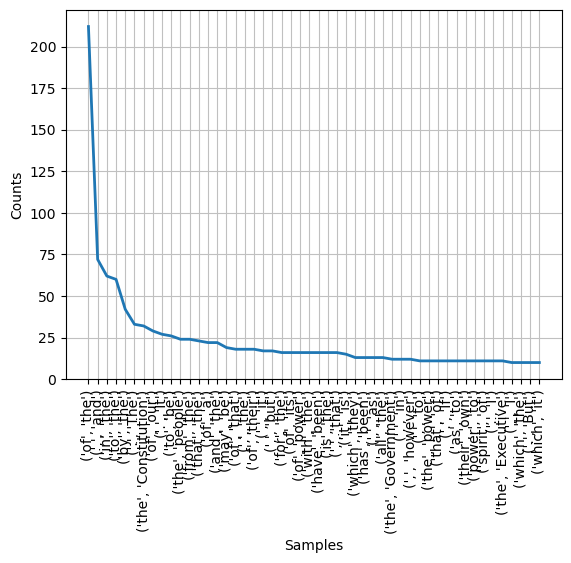

<Axes: xlabel='Samples', ylabel='Counts'>

In [30]:
from nltk import bigrams
bigrams = bigrams(word_tokenize(content, language='english', preserve_line=False))
bigramsDist = FreqDist(bigrams)
bigramsDist.plot(50, cumulative=False)

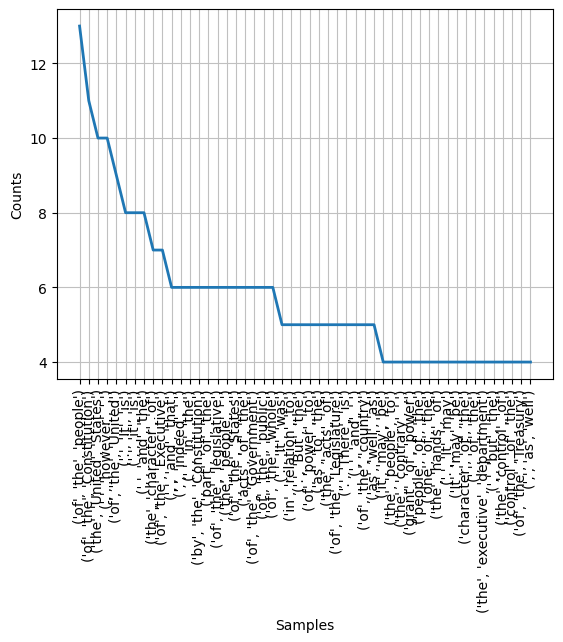

<Axes: xlabel='Samples', ylabel='Counts'>

In [36]:
from nltk import trigrams
trigrams = trigrams(word_tokenize(content, language='english', preserve_line=False))
trigramsDist = FreqDist(trigrams)
trigramsDist.plot(50, cumulative=False)


In [37]:
text = Text(word_tokenize("Strange women lying in ponds distributing swords is no basis for a system of government. Supreme executive power derives from a mandate from the masses, not from some farcical aquatic ceremony.", language='english', preserve_line=False))
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
pos_tag(text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mba/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Strange', 'JJ'),
 ('women', 'NNS'),
 ('lying', 'VBG'),
 ('in', 'IN'),
 ('ponds', 'NNS'),
 ('distributing', 'VBG'),
 ('swords', 'NNS'),
 ('is', 'VBZ'),
 ('no', 'DT'),
 ('basis', 'NN'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('system', 'NN'),
 ('of', 'IN'),
 ('government', 'NN'),
 ('.', '.'),
 ('Supreme', 'NNP'),
 ('executive', 'NN'),
 ('power', 'NN'),
 ('derives', 'VBZ'),
 ('from', 'IN'),
 ('a', 'DT'),
 ('mandate', 'NN'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('masses', 'NNS'),
 (',', ','),
 ('not', 'RB'),
 ('from', 'IN'),
 ('some', 'DT'),
 ('farcical', 'JJ'),
 ('aquatic', 'JJ'),
 ('ceremony', 'NN'),
 ('.', '.')]

In [38]:
from nltk import sent_tokenize

In [57]:
sentences = sent_tokenize("Google is one of the best companies in the world. I constantly google myself to see what I'm up to.", language='english')
nouns = ['NN', 'NNS', 'NNP', 'NNPS']
for sentence in sentences:
    if "google" in sentence.lower():
        taggedWords = pos_tag(word_tokenize(sentence, language='english', preserve_line=False))
        for word in taggedWords:
            if word[0].lower() == "google" and word[1] in nouns:
                print(sentence)

Google is one of the best companies in the world.
